# Exploratory Data Analysis: Amazon Reviews Dataset with Sentiments 
The goal of this notebook is to perform some basic EDA on the combined dataset, which we generated with the spark/pandas job, on all the selected Amazon product categories.

This will be illustrated through basic dataframe manipulations, group-by/aggregation statistics and visualizations with matplotlib and wordcloud.

In [1]:
from read_data import get_output_amazon_data
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the Amazon reviews dataset

In [2]:
amazon_reviews = get_output_amazon_data()
amazon_reviews.head(n=10)

,product_title,product_category,star_rating,helpful_votes,review_body,normalized_review_body,review_body_compound_score,review_body_sentiment_label
0,ACDelco 252-693 Professional Water Pump,Automotive,4.0,1.0,Have it on now for 3 weeks and it seems to be ...,3 weeks working finei think temperature gauge ...,0.3328,positive
1,2013-2014 Dodge Ram 1500 4x4 Black Emblem Name...,Automotive,5.0,0.0,I love it! People thinks this truck belongs to...,love people thinks truck belongs dude nice big...,0.8445,positive
2,Neiko 20598A No-Scratch Auto Trim Removal Tool...,Automotive,5.0,0.0,If you need to remove interior panels from car...,need remove interior panels cars ticket perfec...,0.6360,positive
3,Polaris OEM ATV Fuel Filter,Automotive,5.0,0.0,Love Amazon for carrying this - works perfectly!,love amazon carrying works perfectly,0.8858,positive
4,Meyle 1009550011 Wiper Motor,Automotive,5.0,0.0,As advertised. Works good.,advertised works good,0.4404,positive
5,CH4x4 Rocker Switch Led Light Bar Symbol,Automotive,1.0,0.0,Everything looked good outta the package but t...,looked good outta package s far got instructio...,-0.9365,negative
6,HELLA H71070307 Optilux Extreme White XB 12V ...,Automotive,5.0,0.0,"Easy to install, quick delivery. Looks great w...",easy install quick delivery looks great headli...,0.7906,positive
7,Hopkins 20049 Endurance 7-to-7 Blade 8' Molded...,Automotive,5.0,1.0,I re-did the entire wiring setup from my RV th...,redid entire wiring setup rv bike lift ford wo...,0.8122,positive
8,Anchor 2897 Transmission Mount,Automotive,4.0,0.0,Nice easy to install as well,nice easy install,0.7783,positive
9,Men's Carbon Fiber Genuine Motorcycle Leather ...,Automotive,5.0,0.0,Excellent product. i have had this product for...,excellent product product year constant daily ...,0.8481,positive


# Inspect the shape of the loaded dataframe

In [3]:
rows = amazon_reviews.shape[0]
columns = amazon_reviews.shape[1]

print(f"Total rows: {rows} and total columns: {columns}")

Total rows: 1129386 and total columns: 8


# Unique products and product categories in the dataset

In [4]:
unique_product_categories = amazon_reviews["product_category"].unique()
total_unique_products = amazon_reviews["product_title"].unique().shape[0]

print(f"Total number of unique products in dataset: {total_unique_products}")
print(f"Total number of unique product categories in dataset: {unique_product_categories.shape[0]}")

for index, product_category in enumerate(unique_product_categories):
    print(f"{index + 1}. {product_category}")


Total number of unique products in dataset: 461985
Total number of unique product categories in dataset: 12
1. Automotive
2. Tools
3. Apparel
4. Shoes
5. Software
6. Watches
7. Video Games
8. Sports
9. Electronics
10. Grocery
11. Personal_Care_Appliances
12. Furniture


We seem to have **12** unique product categories, and over 450k unique products within this dataset. 

# Aggregation statistics via grouping by product category

Lets view the mean for the **star rating**, **compound sentiment score** and the **number of helpful votes**.

In [5]:
amazon_reviews.groupby(by="product_category").agg({
    "star_rating": "mean",
    "review_body_compound_score": "mean",
    "helpful_votes": "mean"
})

,star_rating,review_body_compound_score,helpful_votes
product_category,,,
Apparel,4.102743,0.565217,0.972337
Automotive,4.245947,0.485339,1.070108
Electronics,4.027140,0.498420,1.937846
Furniture,4.086864,0.559197,2.408664
Grocery,4.307977,0.582453,1.777313
Personal_Care_Appliances,3.977332,0.466863,3.354118
Shoes,4.243639,0.607712,0.855887
Software,3.565857,0.446663,4.407583
Sports,4.223247,0.531699,1.458272


*Note: Positively meant sentiment scores are typically >= 0.05*

It seems that most product categories in this dataset, are heavily positively biased. This is shown by the consistent mean positive sentiment compound scores, and the high star ratings which are mostly greater than 4.0. The only outlier to this fact would be the 3.97 mean star rating for the **personal care appliances** product category group.

There doesn't seem to be anything useful we can do with the mean number of helpful votes, as the mean ranges seem to be relatively low. 

# Aggregation statistics via grouping by product category and the sentiment label itself
*Note: The sentiment label is a string between 3 options: positive, negative and neutral*

In [6]:
amazon_reviews.groupby(by=["product_category", "review_body_sentiment_label"]).agg({
    "star_rating": "mean",
    "review_body_compound_score": "mean",
    "helpful_votes": "mean"
})

star_rating  \
product_category         review_body_sentiment_label                
Apparel                  negative                        2.281071   
                         neutral                         3.218313   
                         positive                        4.378646   
Automotive               negative                        2.688997   
                         neutral                         3.845266   
                         positive                        4.532215   
Electronics              negative                        2.364592   
                         neutral                         3.500300   
                         positive                        4.377347   
Furniture                negative                        2.222316   
                         neutral                         3.387585   
                         positive                        4.407917   
Grocery                  negative                        2.503074   
                         neutral                         3.815309   
                         positive                        4.540726   
Personal_Care_Appliances negative                        2.524866   
                         neutral                         3.446645   
                         positive                        4.334093   
Shoes                    negative                        2.555284   
                         neutral                         3.512760   
                         positive                        4.454352   
Software                 negative                        2.049200   
                         neutral                         3.270808   
                         positive                        3.972146   
Sports                   negative                        2.649483   
                         neutral                         3.727518   
                         positive                        4.481547   
Tools                    negative                        2.868136   
                         neutral                         3.972793   
                         positive                        4.500664   
Video Games              negative                        2.534950   
                         neutral                         3.684759   
                         positive                        4.339771   
Watches                  negative                        2.316458   
                         neutral                         3.559801   
                         positive                        4.424953   

                                                      review_body_compound_score  \
product_category         review_body_sentiment_label                               
Apparel                  negative                                      -0.446999   
                         neutral                                        0.000123   
                         positive                                       0.725381   
Automotive               negative                                      -0.456752   
                         neutral                                        0.000300   
                         positive                                       0.684907   
Electronics              negative                                      -0.493465   
                         neutral                                        0.000310   
                         positive                                       0.723756   
Furniture                negative                                      -0.509674   
                         neutral                                        0.000335   
                         positive                                       0.752147   
Grocery                  negative                                      -0.474136   
                         neutral                                        0.000458   
                         positive                                       0.738063   
Per

This data frame is telling a much better picture, of how sentiment scores and labelling may impact the star rating of a particular review.

Recall from the Vader documentation for compound scores:

Score >= 0.05: **Positive**

-0.05 < Score < 0.05: **Neutral**

Score <= -0.05: **Negative**

If we inspect the mean compound scores, it seems that all of them make logical sense, according to this reasoning from the documentation. Negative sentiment groups had mean star ratings of around 2.5, neutral sentiment groups had mean star ratings of about 3.5, and positive sentiment groups had mean star ratings of approximately 4.5.

It is common sense that these three categories of sentiments can be associated with ratings of around those values, so our sentiment generations are pretty accurate to the reality of leaving reviews.

There is clearly a correlation between a review's sentiment label/score to the final star rating, given by a customer for products listed on their online store page.


# Find the products with both the highest star rating and sentiment compound scores

In [39]:
amazon_reviews.groupby(by=["product_title", "product_category", "review_body_sentiment_label"]).agg({
    "star_rating": "max",
    "review_body_compound_score": "max"
}).sort_values(by=["star_rating", "review_body_compound_score"], ascending=False).head(n=100)

,,,star_rating,review_body_compound_score
product_title,product_category,review_body_sentiment_label,,
Brainwavz S5 IEM Noise Isolating Earphones With Clearwavz Remote and Microphone for iPhone iPad iPod,Electronics,positive,5.0,1.0000
Corel PaintShop Pro X4,Software,positive,5.0,1.0000
Guild Wars 2,Video Games,positive,5.0,1.0000
Panasonic DMC-GF1 (Silver) with LUMIX G Lens Kit,Electronics,positive,5.0,1.0000
Sealy Optimum Gel Latex Newness Queen Mattress,Furniture,positive,5.0,1.0000
...,...,...,...,...
Mario Sports Mix,Video Games,positive,5.0,0.9998
Mario Strikers Charged,Video Games,positive,5.0,0.9998
Microsoft Office Outlook 2007 with Business Contact Manager [Old Version],Software,positive,5.0,0.9998


According to these top 100 rows, sorted by the **star rating** and **compound score**, that electronics, video games and software are dominant product categories in terms of being highly rated/praised by consumers.

# Bar graph of the total number of reviews per star rating category (1.0-5.0, as whole numbers)

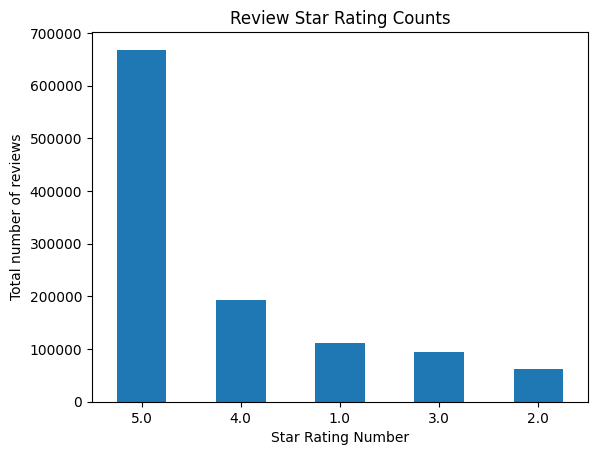

In [7]:
amazon_reviews["star_rating"].value_counts().plot(kind="bar", 
                                                  title="Review Star Rating Counts", 
                                                  xlabel="Star Rating Number", 
                                                  ylabel="Total number of reviews")
plt.xticks(rotation=0)
plt.show()

As shown by our previous mean computations, the number of reviews who have a star rating of >= 4 make the majority of the dataset, which accounts for the bias in positive sentiments.

# Bar graph of total number of reviews for each sentiment label category

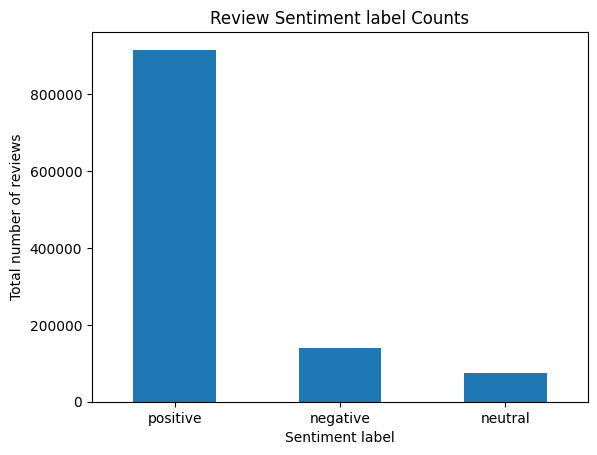

In [8]:
amazon_reviews["review_body_sentiment_label"].value_counts().plot(kind="bar", 
                                                  title="Review Sentiment label Counts", 
                                                  xlabel="Sentiment label", 
                                                  ylabel="Total number of reviews")
plt.xticks(rotation=0)
plt.show()

Once again, the positive bias in the reviews of the dataset is confirmed and the star rating is tied with the compound score and its associated sentiment label.

# Is there a linear relationship between star rating and the compounding sentiment score?
In order to answer this question, we can make a quick scatterplot between star rating and compound score. However, this would be the naive and incorrect way of doing it, because the star rating is a discrete variable currently (ranging from 1.0-5.0, as whole numbers only). It can't be used on the y-axis, because we need a continous variable to make a meaningful inference.

In order to address the drawback on the star rating column, we can normalize/transform it to a continous variable by finding the product between the star rating and the compound score. This product should provide a new series/vector of floating point numbers that range from -5 to 5. We can consider -5 as highly negative and 5 as highly positive, as a general rule of thumb for interpreting this new normalized star rating. 

A plot can be made of **normalized star rating** vs **compound sentiment score** now

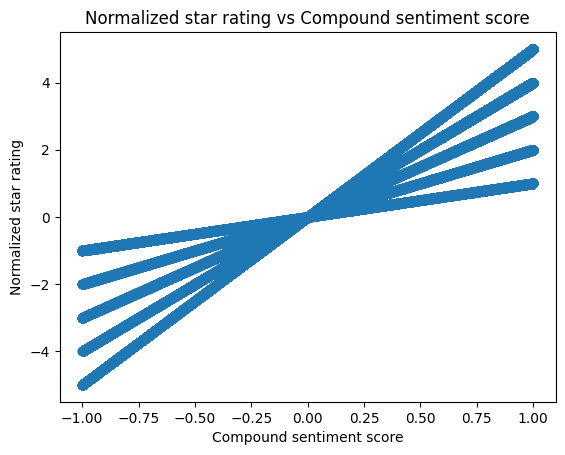

In [9]:
normalized_star_rating = amazon_reviews["star_rating"] * amazon_reviews["review_body_compound_score"]
compound_sentiment_scores = amazon_reviews["review_body_compound_score"]

plt.scatter(x=compound_sentiment_scores, y=normalized_star_rating)
plt.title("Normalized star rating vs Compound sentiment score")
plt.xlabel("Compound sentiment score")
plt.ylabel("Normalized star rating")

plt.show()

There does seem to be a positive, linear relationship between the normalized star rating and the compound score. The plot currently has some interesting gimmicks, which makes it seem like a two-sided fork centred around the convergence point of (0,0). 

What does the (0,0) origin convergence point represent in this context?: That is the point of neutrality in the sentiments of the reviews, as a 0.00 compounding score lies in the acceptable neutral range, according to the Vader documentation. When the product is being computed at the origin, it is likely multiplying many star ratings of around 3.5 (the neutral range we discovered from the mean aggregation table earlier), by something in the range of -0.05 < compound_score < 0.05, leading to a large clustering of points in that region.

Further analysis of things such as slope, intercept and p-value will be done during the machine learning portion of our analysis in this project to address this regression problem.

# Measuring token/word frequencies in the normalized review bodies from the NLP pipeline

We are going to use the word cloud library to generate images of highly occuring words/tokens in the normalized_review_body column of the dataset. This can allow us to see if different groups of data, according to the sentiment label have meaningful words that give it that label in the first place.

In a wordcloud image, words are representing with different colors and font sizes. The larger the font size, the more prevalent/frequent that word occured in the corpus of data you have obtained.

# Helper function for fitting a wordcloud from a general pandas dataframe

Since the series which contains the normalized reviews is a bunch of strings, we can split them all by the space character to get a series of arrays of string tokens. Once we have done the splitting to get the tokens, we can explode that series and get an extended list of every single token that has been unflattened out of those subarrays. We can simply count the values, and pass that data to the fit_words method of an instance of the WordCloud class from the library.|

In [10]:
def fit_word_cloud(reviews_df: pd.DataFrame) -> WordCloud :
    split_review_words = reviews_df["normalized_review_body"].str.split(" ")
    exploded_review_words = split_review_words.explode()
    review_word_counts = exploded_review_words.value_counts()

    return WordCloud().fit_words(review_word_counts)
    

# Word cloud on all the normalized review bodies

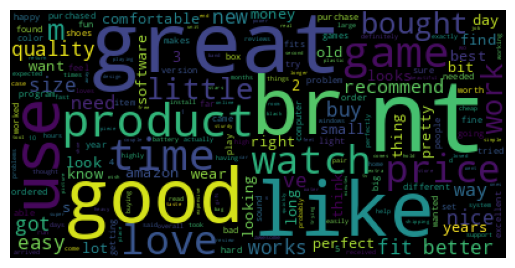

In [20]:
all_reviews_wc = fit_word_cloud(amazon_reviews)

plt.imshow(all_reviews_wc)
plt.axis("off")
plt.show()

There are definitely some meaningful words that not only relate to sentiments, but also words a human would type pretty commonly, when leaving a review for any product that they have purchased on Amazon.

Keywords include **good**, **like**, **bought**, **works**, **perfect**, **great** and **easy**.

# Word clouds of the normalized review bodies belonging to each sentiment label category

In [15]:
positive_reviews = amazon_reviews[amazon_reviews["review_body_sentiment_label"] == "positive"]
negative_reviews = amazon_reviews[amazon_reviews["review_body_sentiment_label"] == "negative"]
neutral_reviews = amazon_reviews[amazon_reviews["review_body_sentiment_label"] == "neutral"]

positive_wc = fit_word_cloud(positive_reviews)
negative_wc = fit_word_cloud(negative_reviews)
neutral_wc = fit_word_cloud(neutral_reviews)

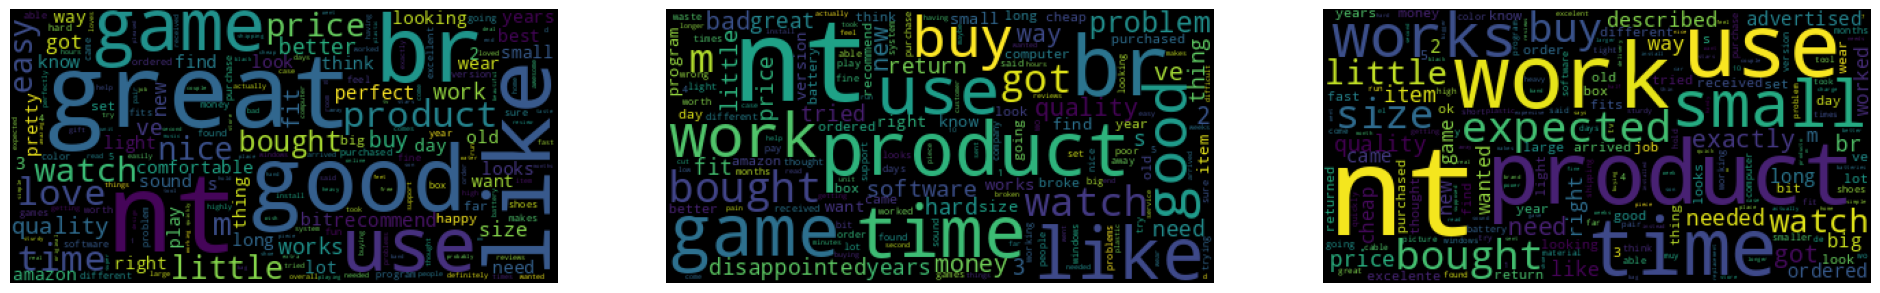

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(24, 4))

axs[0].imshow(positive_wc)
axs[0].axis("off")

axs[1].imshow(negative_wc)
axs[1].axis("off")

axs[2].imshow(neutral_wc)
axs[2].axis("off")

plt.show()

Positive keywords: **good**, **great**, **perfect**, **love**, **quality**

Negative keywords: **disappointed**, **problem**, **time**, **money**

Neutral keywords: **works**, **expected**, **bought**, **described**